# Data Preparation
Dalam mempersiapkan data terdapat beberapa library yang umum digunakan, di antaranya adalah:

1.   Numpy
2.   Pandas

Penerapan yang sering digunakan kedua library tersebut akan kita praktikkan pada Notebook ini.



In [ ]:
# Dalam python, komnter dibuat seperti ini
# Untuk menggunakan library, kita harus melakukan import terlebih dahulu

import numpy as np
import pandas as pd

Kita perlu melakukan download dataset melalui link ini, dan meng-upload-nya seperti gambar di bawah ini
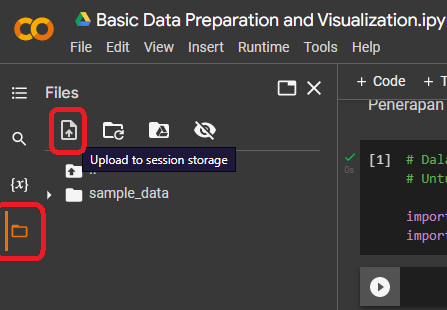

Kita akan memuat file dataset.csv ke dalam variabel df sebagai DataFrame

Hal tersebut dilakukan dengan menggunakan pandas yang telah di import sebagai pd dan menggunakan fungsi read_csv

Untuk mengetahui path dari file yang diunggah, arahkan kursor ke nama file, klik "titik tiga" di bagian kanan, dan "Copy path"

In [ ]:
#Dataset: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt
df = pd.read_csv("/content/16P.csv",encoding='cp1252') #Load dataset
print(type(df)) #Menampilkan tipe data df
df.tail() #Menampilkan data teratas

<class 'pandas.core.frame.DataFrame'>


,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ
59998,59998,0,0,2,0,-1,0,0,0,2,...,0,-1,0,3,1,0,1,0,-1,INFJ


Dalam data teratas pada variabel pd terdapat banyak sekali data yang ada, dan salah satu nilai yang terlihat adalah NaN yang mewakili Not a Number. NaN inilah salah satu hal yang perlu dibersikan karena NaN tidak berisi apa-apa pada nilainya, namun cara membersihkan NaN akan dijelaskan nanti. Untuk sekarang mari kita pilih kolom yang ingin digunakan

In [ ]:
df = pd.read_csv("/content/16P.csv",encoding='cp1252') #Data perlu di load ulang karena karakteristik inplace=True
#penjelasan lebih lanjut dapat di baca pada "https://towardsdatascience.com/why-you-should-probably-never-use-pandas-inplace-true-9f9f211849e4"

to_drop = ['Response Id']

df.drop(to_drop, inplace=True, axis=1) #Fungsi untuk menghapus kolom tertentu sesuai to_drop
#namun, tidak selalu perlu menggunakan variabel lain seperti to_drop, dapat berupa baris kode di bawah ini

# df_dropped = df.drop(['Response Id'], inplace=True, axis=1)
# df.drop(columns=to_drop, inplace=True) #atau dapat menggunakan kode ini
df.head()

In [ ]:
# Selain dengan menggunakan drop, kita dapat memilih kolom tertentu saja
df[['Response Id']].head()

In [ ]:
#Check for NaN Value
check_nan = df.isnull().values.any()
 
print(check_nan)

False


In [ ]:
# Mari kita bersihkan data, dengan menghilangkan NaN
clean_df = df.dropna()
clean_df.head()

In [ ]:
# NaN pun dapat diberikan nilai
df.fillna(13+0).head()

In [ ]:
#Check column type
result = df.dtypes

print("Output:")
print(result)

Output:
Response Id                                                                                    int64
You regularly make new friends.                                                                int64
You spend a lot of your free time exploring various random topics that pique your interest     int64
Seeing other people cry can easily make you feel like you want to cry too                      int64
You often make a backup plan for a backup plan.                                                int64
                                                                                               ...  
You are very intrigued by things labeled as controversial.                                     int64
You would pass along a good opportunity if you thought someone else needed it more.            int64
You struggle with deadlines.                                                                   int64
You feel confident that things will work out for you.                              

In [ ]:
df.duplicated(['Response Id']) # mencari nilai duplikat dari kolom

0        False
1        False
2        False
3        False
4        False
         ...  
59994    False
59995    False
59996    False
59997    False
59998    False
Length: 59999, dtype: bool

In [ ]:
clean_df.drop_duplicates(inplace = True) # menghapus duplikat

# Data Visualization

Untuk memahami data kita dapat dibantu dengan menampilkannya pada grafik, berikut merupakan contoh paling dasar untuk menampilkan grafik menggunakan data yang sebelumnya kita gunakan

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#menjumlahkan data pada kolom
df = pd.read_csv("/content/16P.csv",encoding='cp1252')
list_of_my_columns = ['You struggle with deadlines.']
df['Sum'] = df[list_of_my_columns].sum(axis=1)
len(df[df.Sum == 1])

12211

Text(0, 0.5, 'Respondent')

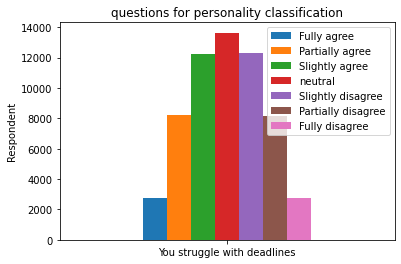

In [ ]:
#visualisasi jumlah data yang ada pada kolom
Fully_agree = len(df[df.Sum == 3])
Partially_agree = len(df[df.Sum == 2])
Slightly_agree = len(df[df.Sum == 1])
neutral = len(df[df.Sum == 0])
Slightly_disagree = len(df[df.Sum == -1])
Partially_disagree = len(df[df.Sum == -2])
Fully_disagree = len(df[df.Sum == -3])
index = ['You struggle with deadlines']

df = pd.DataFrame({'Fully agree': Fully_agree,
                   'Partially agree': Partially_agree,
                   'Slightly agree': Slightly_agree,
                   'neutral': neutral,
                   'Slightly disagree': Slightly_disagree,
                  'Partially disagree': Partially_disagree,
                  'Fully disagree': Fully_disagree}, index=index)
ax = df.plot.bar(rot=0)

plt.title("questions for personality classification")
plt.ylabel("Respondent")

Referensi lebih lanjut untuk pyplot [klik di sini](https://www.w3schools.com/python/matplotlib_intro.asp)